# Purpose : 

This notebook is the best reference for someone who is starting Deep Learning. 

This notebook provides a hands on eperience on MP Neuron and Perceptron. 

I used very less predefined functions to understand the need for these functions. 

In [2]:
import sklearn.datasets
import numpy as np

In [3]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [4]:
X = breast_cancer.data
Y = breast_cancer.target

In [5]:
type(breast_cancer)

sklearn.utils.Bunch

In [6]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [7]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [8]:
import pandas as pd

In [9]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [11]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
data['class'] = breast_cancer.target

In [13]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000,12.450000,18.250000,13.710000,13.000000,12.460000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000,15.700000,19.980000,20.830000,21.820000,24.040000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000,82.570000,119.600000,90.200000,87.500000,83.970000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000,477.100000,1040.000000,577.900000,519.800000,475.900000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300,0.127800,0.094630,0.118900,0.127300,0.118600
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800,0.170000,0.109000,0.164500,0.193200,0.239600
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000,0.157800,0.112700,0.093660,0.185900,0.227300
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300,0.080890,0.074000,0.059850,0.093530,0.085430
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900,0.208700,0.179400,0.219600,0.235000,0.203000
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830,0.076130,0.057420,0.074510,0.073890,0.082430


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [15]:
data['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [16]:
data.groupby('class').mean().T

class,0,1
mean radius,17.462830,12.146524
mean texture,21.604906,17.914762
mean perimeter,115.365377,78.075406
mean area,978.376415,462.790196
mean smoothness,0.102898,0.092478
mean compactness,0.145188,0.080085
mean concavity,0.160775,0.046058
mean concave points,0.087990,0.025717
mean symmetry,0.192909,0.174186
mean fractal dimension,0.062680,0.062867


# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = data.drop('class', axis = 1)
Y = data['class']


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.1, stratify= Y, random_state=1)

In [20]:
print(X.shape, x_train.shape, x_test.shape )

(569, 30) (512, 30) (57, 30)


In [21]:
print(Y.mean(), y_train.mean(), y_test.mean() )

0.6274165202108963 0.626953125 0.631578947368421


In [22]:
import matplotlib.pyplot as plt



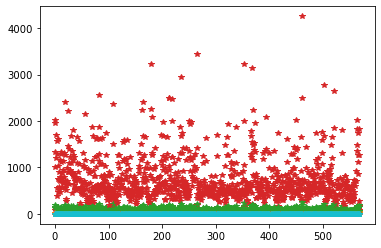

In [23]:
plt.plot(x_train, '*')
plt.show()

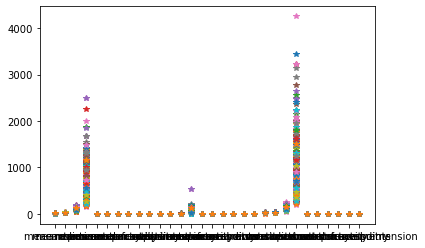

In [24]:
plt.plot(x_train.T, '*')
plt.show()

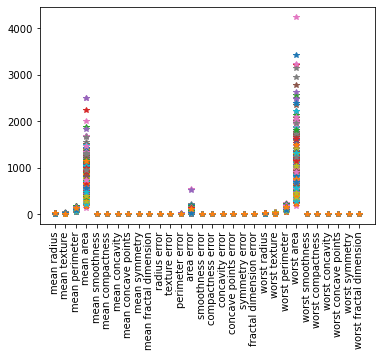

In [25]:
plt.plot(x_train.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [26]:
x_binarized_3 = x_train['mean area'].map(lambda x: 0 if x <1000 else 1)

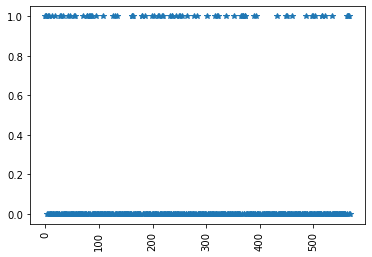

In [27]:
plt.plot(x_binarized_3.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [28]:
# we can use a predefined function to do this for all columns at one go.
x_binarized_train  = x_train.apply(pd.cut, bins =2 , labels =[0,1])

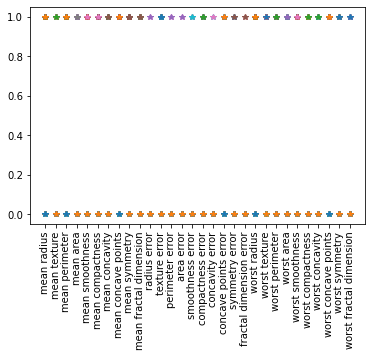

In [29]:
plt.plot(x_binarized_train.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [30]:
# from the above plot we can say that the train dataframe is binarized.
# now lets do the same to test data\
x_binarized_test  = x_test.apply(pd.cut, bins =2 , labels =[0,1])


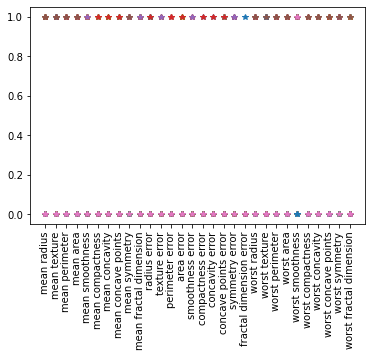

In [31]:
plt.plot(x_binarized_test.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [32]:
# converting them to numpy arrays

x_binarized_train = x_binarized_train.values
x_binarized_test = x_binarized_test.values


In [33]:
type(x_binarized_train)

numpy.ndarray

In [34]:
# now the above data is ready for model consumption

In [35]:
#inference and search

# let's assume the value of b = 3. And to get the best results we have to check b value from 0 to no of columns in the x_binarixed_train

In [36]:
b = 3
# lets check for a single row like row number 252
i = 252
if (np.sum(x_binarized_train[25, : ]) >= b ):  # here we are selecting the 25th row and all its columns and adding them. And that result is compared with b.
    print('MP Neuron`s prediction is Malignant')
else:
    print("NP Neuron`s prediction id benign")

#lets check the actual value

if (y_train[i] == 1):
    print('The actual value is malignant')
else:    
    print('The actual value is benign')    

MP Neuron`s prediction is Malignant
The actual value is benign


In [37]:
# lets try random rows

from random import randint # it gives random int values with in the specified range

In [38]:
b = 3
# lets check for a single row like row number 252
i = randint(0, x_binarized_train.shape[0]) 
print(i,'th row')
if (np.sum(x_binarized_train[25, : ]) >= b ):  # here we are selecting the 25th row and all its columns and adding them. And that result is compared with b.
    print('MP Neuron`s prediction is Malignant')
else:
    print("NP Neuron`s prediction id benign")

#lets check the actual value

if (y_train[i] == 1):
    print('The actual value is malignant')
else:    
    print('The actual value is benign')    

13 th row
MP Neuron`s prediction is Malignant
The actual value is benign


In [39]:
# lets check the accuracy at b = 3
b = 3

y_pred_train = []
accurate_rows = 0
for x, y in zip(x_binarized_train, y_train):
    y_pred = (np.sum(x) >= b)
    y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

print(accurate_rows, accurate_rows/x_binarized_train.shape[0])

77 0.150390625


In [40]:
# now we have to iterate b values from 0 to no of columns i.e, 30. The best b value gives us the best accuracy
for b in range(0, x_binarized_train.shape[1] + 1):
    y_pred_train = []
    accurate_rows = 0
    for x, y in zip(x_binarized_train, y_train):
        y_pred = (np.sum(x) >= b)
        y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows/x_binarized_train.shape[0])



0 0.626953125
1 0.240234375
2 0.185546875
3 0.150390625
4 0.154296875
5 0.181640625
6 0.21484375
7 0.244140625
8 0.275390625
9 0.298828125
10 0.3125
11 0.328125
12 0.3359375
13 0.34375
14 0.3515625
15 0.357421875
16 0.3671875
17 0.369140625
18 0.373046875
19 0.373046875
20 0.373046875
21 0.373046875
22 0.373046875
23 0.373046875
24 0.373046875
25 0.373046875
26 0.373046875
27 0.373046875
28 0.373046875
29 0.373046875
30 0.373046875


In [41]:
# one of the reasons why the model is under performing is becase of a mistake in binarization. Lets look it to the groupby('class').mean() again
data.groupby('class').mean().T

class,0,1
mean radius,17.462830,12.146524
mean texture,21.604906,17.914762
mean perimeter,115.365377,78.075406
mean area,978.376415,462.790196
mean smoothness,0.102898,0.092478
mean compactness,0.145188,0.080085
mean concavity,0.160775,0.046058
mean concave points,0.087990,0.025717
mean symmetry,0.192909,0.174186
mean fractal dimension,0.062680,0.062867


In [42]:
# most of the mean values for 0 are larger then mean of 1. and when we are binarizing we have labled all the higher values to 1 and lower values to 0. 
# that could be the mistake. so lets correct it.

In [43]:
x_binarized_train  = x_train.apply(pd.cut, bins =2 , labels =[1,0]) # just changed lables from [0,1] to [1,0]
x_binarized_test  = x_test.apply(pd.cut, bins =2 , labels =[1,0]) # just changed lables from [0,1] to [1,0]


In [44]:
# converting them to numpy arrays

x_binarized_train = x_binarized_train.values
x_binarized_test = x_binarized_test.values


In [45]:
# now lets run the model again
for b in range(0, x_binarized_train.shape[1] + 1):
    y_pred_train = []
    accurate_rows = 0
    for x, y in zip(x_binarized_train, y_train):
        # np.sum(x)
        y_pred = (np.sum(x) >= b)
        y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows/x_binarized_train.shape[0])



0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


In [46]:
# at b = 28, we get 84.96% of accuracy. 

# model testing

# we will test the model at b = 27 and b = 28, as both 2 and 28 gave good accuracy and there is not much difference between them

# instead of calculating accuracy manually, lets use a predefined method now

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
b = 27
y_pred_test = []
for x in x_binarized_test:
    y_pred = (np.sum(x) >= b)
    y_pred_test.append(y_pred)

accuracy = accuracy_score(y_pred_test, y_test)
print(b, accuracy)

27 0.8596491228070176


In [49]:
b = 28
y_pred_test = []
for x in x_binarized_test:
    y_pred = (np.sum(x) >= b)
    y_pred_test.append(y_pred)

accuracy = accuracy_score(y_pred_test, y_test)
print(b, accuracy)

28 0.7894736842105263


In [50]:
# We have a situation here, even though we are geting best training accuracy at b = 28, the test accuracy at b= 28 is far away form training accuracy.
# on the other hand, when b= 27, thew train and test accuracies are very closeer to each other and the test accurcy is much better. So the best model we can select is when b = 27

# Using classes to templatize

In [51]:
class MPNeuron:

    def __init__(self): # To define class attributes (variables)
        self.b = None

    def model(self, x):  # Tries to find out
        return (sum(x) >= self.b)

    def predict(self, X): 
        Y = []
        for x in X: 
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y):
        accuracy = {}

        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)

        best_b = max(accuracy, key= accuracy.get)
        self.b = best_b

        print('Optimal Value of b is ', best_b)
        print('Highest accuracy is', accuracy[best_b])

In [52]:
mp_neuron = MPNeuron()
mp_neuron.fit(x_binarized_train, y_train)

Optimal Value of b is  28
Highest accuracy is 0.849609375


In [53]:
# if we use test data same as above

# mp_neuron.fit(x_binarized_test, y_test)

In [54]:
# On test data we always use predict function

Y_test_pred = mp_neuron.predict(x_binarized_test)
Y_test_pred

array([False, False,  True,  True, False,  True, False, False, False,
        True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
        True,  True, False, False,  True,  True, False,  True, False,
       False, False,  True])

In [55]:
accuracy_test = accuracy_score(Y_test_pred, y_test)
print(accuracy_test)

0.7894736842105263


In [56]:
print(accuracy_test)

0.7894736842105263


# Model Explanation

Once we split the data to X_train, X_test, Y_train, and Y_test, We have following three operations.

# Training
    Here we use X_train and Y_train data to fit into the model like model.fit(X_train, Y_train)
    The model looks at every observation in the training data and comes up with many functions to model the relationship between X_train and Y_train such that Y_train = f(X_train).
    Among these functions, the model selects one funtion with the least loss(error).

    Just for the sake of understanding consider that best function is  y = f(x) = 5x + 10, in this example x has a single column.

# Testing

    Now the model has best function which models the relationship between X_train and Y_train.
    Now we use model.predict() function and pass X_test as a parameter like model.predict(X_test)
    model.predict(X_test) gives us the approximate Y_test or predicted Y_test. 
    So we write as Y_test_pred = model.predict(X_test)


# Model Evalution

    We use accuarcy to find out how much the model is reliable. The accuracy varries from 0 to 1 which is from 0 to 100%.
    The accuracy is calculated by no of currect predictions / total number of observations.
    Suppose there are total 100 observations and the model predicted 85 correctly. Then the accuracy is 85%. 
    We can also see it as the model gives around 85% correct predictions on a unseen data. 

    Let a = [1,2,3,4,5,6,7,8,9,14] and b= [1,2,5,5,6,7,8,9,14] then accuracy_score(a, b) is 90%.

    We also come across training accuracy and testing accuracy.

# # Training accuracy

        First the model comes up with a function, such that the function gives least error with the training data.
        However this function doesnot give 100% accuracy on the training data, even though it has seen it already. 
        It uses its best function to calculate(predict) Y_train_pred on X_train test.  
        And based on the best function, the Y_train_pred may not be same as Y_train. 

        So the testing accuracy is no of similarities in Y_train and Y_train_pred / no of total observations in Y_train


# # Testing accuracy
        Once the training accuracy is calculated, then the model is given the X_test data like model.predict(X_data)
        This model.predict(X_data) will give us the Y_test_pred. 
        Once we have the Y_test_pred, we compare it with the actual Y_test data. and calculate the accuracy.

        So the testing accuracy is no of similarities in Y_test and Y_test_pred  No of total records.



# Perceptron Class 
$y =1, if \sum_i w_i x_i >= b $

$y = 0, otherwise $

In [57]:
class Perceptron:

    def __init__(self):
        self.w = None # w is a array
        self.b = None # b is a scalar

    def model(self, x):
        return 1 if (np.dot(self.w, x) >= b) else 0


    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y): # here we cant apply bootforce method to find b, w, as b and w are real numbers
        # learning alg
        # print(X.shape[1])
        self.w = np.ones(X.shape[1])
        print('Before: w')
        print(self.w)
        print('Before: b')
        self.b = 0
        print(b)

        for x, y in zip(X,Y):
            y_pred = self.model(x)
            if y==1 and y_pred ==0:
                self.w = self.w + x
                self.b = self.b + 1

            elif y == 0 and y_pred == 1:
                self.w = self.w - x
                self.b = self.b - 1 
        print('after :w')
        print(self.w)
        print('After :b')
        print(self.b)

             



In [58]:
perceptron = Perceptron()


In [59]:
# we can use the actual values instead of binarized values
# and converting thhem to arrays
X_train = x_train.values
X_test = x_test.values

In [60]:
perceptron.fit(X_train, y_train)

# observe how b, w values change before and after

# b valsue is coming from 28 instead of 0, Why?


Before: w
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Before: b
28
after :w
[ 4.4787000e+02  8.3489000e+02  2.7157700e+03  2.0408000e+03
  5.7084700e+00  2.0157400e+00 -2.3629660e+00 -7.8631100e-01
  9.9227000e+00  4.5390700e+00  3.2492000e+00  6.7091400e+01
  1.3170500e+01 -1.1429410e+03  1.3688870e+00  1.4125040e+00
  1.2378939e+00  1.1849880e+00  2.0698010e+00  1.1560210e+00
  4.4626900e+02  1.0824500e+03  2.6876200e+03 -3.7992000e+03
  7.2313300e+00  1.2725100e+00 -3.1415070e+00 -7.8600000e-02
  1.4028700e+01  4.9343900e+00]
After :b
57


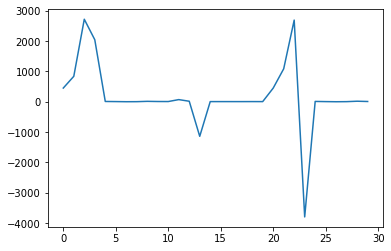

In [61]:
import matplotlib.pyplot as plt
plt.plot(perceptron.w)
plt.show()

In [62]:
X_train[1]

array([1.205e+01, 1.463e+01, 7.804e+01, 4.493e+02, 1.031e-01, 9.092e-02,
       6.592e-02, 2.749e-02, 1.675e-01, 6.043e-02, 2.636e-01, 7.294e-01,
       1.848e+00, 1.987e+01, 5.488e-03, 1.427e-02, 2.322e-02, 5.660e-03,
       1.428e-02, 2.422e-03, 1.376e+01, 2.070e+01, 8.988e+01, 5.826e+02,
       1.494e-01, 2.156e-01, 3.050e-01, 6.548e-02, 2.747e-01, 8.301e-02])

In [63]:
# accuracy
Y_train_pred = perceptron.predict(X_train)


print('Training accuracy :', accuracy_score(Y_train_pred, y_train))

Training accuracy : 0.373046875


In [64]:
Y_test_pred = perceptron.predict(X_test)


print('Training accuracy :', accuracy_score(Y_test_pred, y_test))

Training accuracy : 0.3684210526315789


In [65]:
# the accuracy is too low. Lets see why?

# the problem is w and b value keeps changing from one record to another record in the data hrough .fit()

# what ever we have currently is called one epoch

In [66]:
class Perceptron:
    
    def __init__(self):
        self.w = None # w is a array
        self.b = None # b is a scalar

    def model(self, x):
        return 1 if (np.dot(self.w, x) >= b) else 0


    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y, epochs = 1): 
        self.w = np.ones(X.shape[1])
        # print('Before: w')
        # print(self.w)
        # print('Before: b')
        self.b = 0
        # print(b)

        for i in range(epochs):
            for x, y in zip(X,Y):
                y_pred = self.model(x)
                if y==1 and y_pred ==0:
                    self.w = self.w + x
                    self.b = self.b + 1

                elif y == 0 and y_pred == 1:
                    self.w = self.w - x
                    self.b = self.b - 1 
            # print('after :w')
            # print(self.w)
            # print('After :b')
            # print(self.b)

                



In [67]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train, 2)
Y_train_pred = perceptron.predict(X_train)
print(accuracy_score(y_train, Y_train_pred))

0.91015625


In [68]:
# 2 epochs are leading to 91% accuracy. Look at the change. 

# lets try with 3 epochs
perceptron.fit(X_train, y_train, 3)
Y_train_pred = perceptron.predict(X_train)
print(accuracy_score(y_train, Y_train_pred))

0.373046875


In [69]:
# for 3 epochs it again dropped

# lets plot pochs vs accuracy

In [70]:
class Perceptron:
    
    def __init__(self):
        self.w = None # w is a array
        self.b = None # b is a scalar

    def model(self, x):
        return 1 if (np.dot(self.w, x) >= b) else 0


    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y, epochs = 1): 
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy ={}
        max_accuracy = 0
        for i in range(epochs):
            for x, y in zip(X,Y):
                y_pred = self.model(x)
                if y==1 and y_pred ==0:
                    self.w = self.w + x
                    self.b = self.b + 1

                elif y == 0 and y_pred == 1:
                    self.w = self.w - x
                    self.b = self.b - 1

            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]

        plt.plot(accuracy.values())
        plt.show()
        print('Best Accuracy',max_accuracy)
            



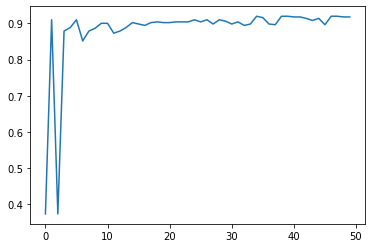

Best Accuracy 0.919921875
Accuracy in last epoch : 0.91796875


In [71]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train, 50) # lets see for 50 epochs
Y_train_pred = perceptron.predict(X_train)
print('Accuracy in last epoch :',accuracy_score(y_train, Y_train_pred))

# Check points

In [72]:
class Perceptron:
    
    def __init__(self):
        self.w = None # w is a array
        self.b = None # b is a scalar

    def model(self, x):
        return 1 if (np.dot(self.w, x) >= b) else 0


    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y, epochs = 1): 
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy ={}
        max_accuracy = 0
        for i in range(epochs):
            for x, y in zip(X,Y):
                y_pred = self.model(x)
                if y==1 and y_pred ==0:
                    self.w = self.w + x
                    self.b = self.b + 1

                elif y == 0 and y_pred == 1:
                    self.w = self.w - x
                    self.b = self.b - 1

            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                check_point_w = self.w
                check_point_b = self.b

        self.w = check_point_w
        self.b = check_point_b

        print('Best w: ', self.w)
        print('Best b: ', self.b)

        plt.plot(accuracy.values())
        plt.show()
        print('Best Accuracy',max_accuracy)
            



Best w:  [ 3.62758400e+03  2.69770000e+03  1.91405200e+04  4.77030000e+03
  2.23261400e+01 -8.01244500e+01 -1.49878929e+02 -6.11006100e+01
  3.55637000e+01  2.13212400e+01  4.12900000e+00  1.01304100e+02
 -3.78445100e+02 -8.80625600e+03  4.41710000e-01 -2.70766330e+01
 -3.73497295e+01 -7.12454900e+00 -7.76714000e-01 -9.84692600e-01
  3.80529600e+03  2.49143000e+03  1.75444600e+04 -8.29780000e+03
  1.73538800e+01 -2.97841790e+02 -3.86601591e+02 -1.04092764e+02
  1.11026000e+01  1.80285000e+00]
Best b:  496


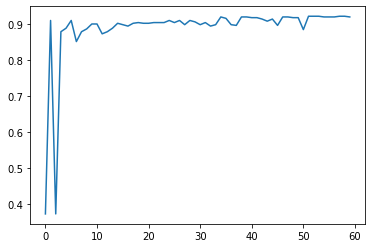

Best Accuracy 0.921875
Accuracy in last epoch : 0.921875


In [73]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train, 60) # lets see for 50 epochs
Y_train_pred = perceptron.predict(X_train)
print('Accuracy in last epoch :',accuracy_score(y_train, Y_train_pred))

In [74]:
# By using check points, we can see the best accuracy and the final accuracy are same

# epochs are the first hyper parameters. By increasing epochs we may get better accuracy and it also higher computation power.

# Learning Rate

In the above example the default learning rate is 1. That means the model has to take exactly one step above or below.

Learning rate helps to take smaller steps to get te best accuracy in the least epoch. 

Learning rate is the second hyperparameter in Deep Learning. We have to tune the lr value to get optimised results.

In [75]:
class Perceptron:
    
    def __init__(self):
        self.w = None # w is a array
        self.b = None # b is a scalar

    def model(self, x):
        return 1 if (np.dot(self.w, x) >= b) else 0

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y, epochs = 1, lr = 1): 
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy ={}
        max_accuracy = 0
        for i in range(epochs):
            for x, y in zip(X,Y):
                y_pred = self.model(x)
                if y==1 and y_pred ==0:
                    self.w = self.w + lr * x  # we add lr here
                    self.b = self.b + lr * 1 # we add lr here

                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x #here
                    self.b = self.b - lr * 1 #here

            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                check_point_w = self.w
                check_point_b = self.b

        self.w = check_point_w
        self.b = check_point_b

        
        plt.plot(accuracy.values())
        plt.show()
        print('Best Accuracy',max_accuracy)
            



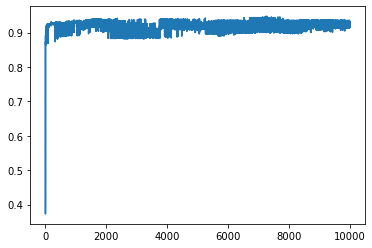

Best Accuracy 0.947265625
Accuracy in last epoch : 0.947265625


In [76]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train, 10000, 0.0005) # lets see for 10000 epochs and lr = 0.0005
Y_train_pred = perceptron.predict(X_train)
print('Accuracy in last epoch :',accuracy_score(y_train, Y_train_pred))

# Weight Animations

In [77]:
class Perceptron:
    
    def __init__(self):
        self.w = None # w is a array
        self.b = None # b is a scalar

    def model(self, x):
        return 1 if (np.dot(self.w, x) >= b) else 0

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y, epochs = 1, lr = 1): 
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy ={}
        max_accuracy = 0

        wt_matrix =[]
        b_matrix =[]
        for i in range(epochs):
            for x, y in zip(X,Y):
                y_pred = self.model(x)
                if y==1 and y_pred ==0:
                    self.w = self.w + lr * x  # we add lr here
                    self.b = self.b + lr * 1 # we add lr here

                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x #here
                    self.b = self.b - lr * 1 #here

            wt_matrix.append(self.w)
            b_matrix.append(self.b)
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                check_point_w = self.w
                check_point_b = self.b

        self.w = check_point_w
        self.b = check_point_b

        
        plt.plot(accuracy.values())
        plt.show()
        print('Best Accuracy',max_accuracy)

        return np.array(wt_matrix)
            



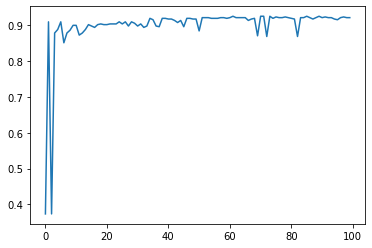

Best Accuracy 0.92578125
Accuracy in last epoch : 0.92578125


In [78]:
perceptron = Perceptron()
wt_martix = perceptron.fit(X_train, y_train, 100) # lets see for 100 epochs and lr = 1
Y_train_pred = perceptron.predict(X_train)
print('Accuracy in last epoch :',accuracy_score(y_train, Y_train_pred))

In [79]:
Y_test_pred = perceptron.predict(X_test)
print('Test Accuracy', accuracy_score(Y_test_pred, y_test))

Test Accuracy 0.9473684210526315


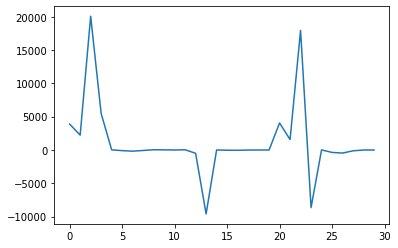

In [80]:
plt.plot(perceptron.w)

In [81]:
# The above plot is important for dimentionality reduction. The plot says which are the most usefull columns in the dataset.
# It will also tell how much they are important.

# The larger positive values and larger negative numbers, those columns are contributing a lot. 
# In other words you can remove many colums whose weights are closer to zero. Even after removing these columns the model gives same accuracy. 
# By removing these unwanted columns, I can save lot of computational time too

In [82]:
%matplotlib inline 
from matplotlib import animation, rc
from IPython.display import HTML

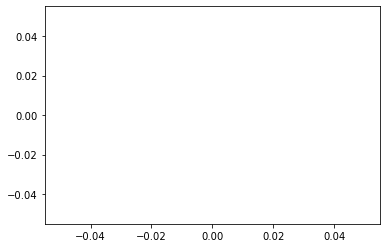

In [83]:
fig, ax = plt.subplots()

line, = ax.plot([], [], lw =2)

In [84]:
def animate(i):
    x = np.linspace(0,2,1000)
    y = np.sin(2 * np.pi* (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [85]:
anim = animation.FuncAnimation(fig, animate, frames = 100, interval =20, blit = True)

In [86]:
import matplotlib.animation as manimation; manimation.writers.list()

['pillow', 'html']

In [88]:
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [ ]:
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/ 
# the above code was supposed to give animation frame by frame.